PROBLEMA 1

In [593]:
Problema 1 

    El fichero HAVD Exo02.csv contiene en formato csv datos demográficos de la ciudad de Barcelona obtenidos como datos abiertos proporcionados por la propia ciudad. Se trata del número de habitantes, por edades y por distrito. El último valor representa las personas de más de cien años. 

        1.-Representar un histograma con la distribución de la población de la ciudad por edades. 

        2.-Representar un boxplot para la distribución de edades de la ciudad. 

        3.-Calcular la media y la desviación estándar de la distribución de edades de la ciudad. Comentar y analizar los resultados.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:10: unexpected numeric constant
1: Problema 1
             ^


In [391]:
install.packages("pastecs")
library(pastecs) #>> las funciones: str,stat.desc, table,plot,...
install.packages("modeest")
library(modeest) #>> calcular la moda
install.packages("vcd")
library(vcd)#necesario para ggplo2
library(dplyr) #>> manipulación de datasets: group_by(), summarize()
library(scales) #útil para graficación
install.packages("agricolae")
library(agricolae)  #>> crear tablas de frecuencias agrupadas
install.packages("ggplot2")
library(ggplot2) #>> graficación
install.packages("car")
library(car) #lo necesitamos para el qqPlot

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error: package or namespace load failed for ‘ggplot2’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace ‘rlang’ 0.4.11 is already loaded, but >= 1.0.0 is required


In [ ]:
EXTRACTING THE DATA

In [235]:
data_exo <- read.csv (file = 'HAVD_Exo02.csv', header = TRUE, sep = ',', dec = '.')  
head(data_exo)
tail(data_exo)
head(data_exo, 10)
data_exo[1,]

,Dte.,Barris,TOTAL,X0,X1,X2,X3,X4,X5,X6,⋯,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,BARCELONA,,1625137,13633,13918,13712,13533,14018,13968,13801,⋯,4528,3761,2923,2309,1658,1223,827,565,398,767
2,1,1. el Raval,47986,449,431,409,396,457,475,462,⋯,91,67,50,30,30,20,12,9,2,12
3,1,2. el Barri Gòtic,16240,99,97,93,88,99,97,89,⋯,38,36,27,25,11,9,11,3,0,11
4,1,3. la Barceloneta,15101,94,100,86,101,80,71,86,⋯,30,37,29,15,15,12,6,3,5,5
5,1,"4. Sant Pere, Santa Caterina i la Ribera",22923,177,168,166,145,166,164,145,⋯,38,42,31,28,12,9,6,8,5,14
6,2,5. el Fort Pienc,32048,251,266,268,240,281,238,262,⋯,106,73,75,49,44,31,17,16,7,14


,Dte.,Barris,TOTAL,X0,X1,X2,X3,X4,X5,X6,⋯,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
69,10,68. el Poblenou,33931,340,333,367,342,382,409,387,⋯,86,74,49,38,23,21,13,7,6,6
70,10,69. Diagonal Mar i el Front Marítim del Poblenou,13710,190,190,177,226,209,204,169,⋯,12,17,13,6,6,3,2,1,1,6
71,10,70. el Besòs i el Maresme,22893,190,203,227,187,239,246,244,⋯,48,43,28,14,14,12,9,6,1,10
72,10,71. Provençals del Poblenou,20649,177,194,210,212,220,206,199,⋯,38,19,29,24,9,8,5,2,5,1
73,10,72. Sant Martí de Provençals,26187,181,198,208,205,232,222,212,⋯,67,62,43,34,22,16,10,10,10,5
74,10,73. la Verneda i la Pau,28725,234,227,205,202,233,211,263,⋯,75,72,47,40,24,16,9,11,5,9


,Dte.,Barris,TOTAL,X0,X1,X2,X3,X4,X5,X6,⋯,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,BARCELONA,,1625137,13633,13918,13712,13533,14018,13968,13801,⋯,4528,3761,2923,2309,1658,1223,827,565,398,767
2,1,1. el Raval,47986,449,431,409,396,457,475,462,⋯,91,67,50,30,30,20,12,9,2,12
3,1,2. el Barri Gòtic,16240,99,97,93,88,99,97,89,⋯,38,36,27,25,11,9,11,3,0,11
4,1,3. la Barceloneta,15101,94,100,86,101,80,71,86,⋯,30,37,29,15,15,12,6,3,5,5
5,1,"4. Sant Pere, Santa Caterina i la Ribera",22923,177,168,166,145,166,164,145,⋯,38,42,31,28,12,9,6,8,5,14
6,2,5. el Fort Pienc,32048,251,266,268,240,281,238,262,⋯,106,73,75,49,44,31,17,16,7,14
7,2,6. la Sagrada Família,51651,395,406,405,343,375,361,345,⋯,195,166,115,80,84,53,34,22,13,24
8,2,7. la Dreta de l'Eixample,44246,365,402,358,354,358,371,354,⋯,155,147,108,103,67,68,40,37,23,50
9,2,8. l'Antiga Esquerra de l'Eixample,42512,324,342,328,316,323,323,287,⋯,145,137,93,80,59,47,26,34,20,45


,Dte.,Barris,TOTAL,X0,X1,X2,X3,X4,X5,X6,⋯,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,BARCELONA,,1625137,13633,13918,13712,13533,14018,13968,13801,⋯,4528,3761,2923,2309,1658,1223,827,565,398,767


In [531]:
df_t <- data.frame(t(data_exo[1,-2:-3]))

df_c <- data.frame(df_t[-1,])
colnames(df_c) <- c('BCN')

df_c <- as.character(df_c$BCN)

df <- as.integer(df_c)


edad <- c(0:100)

df = rbind(df, edad)

df_final = data.frame(t(df))
df_final




df,edad
<int>,<int>
13633,0
13918,1
13712,2
13533,3
14018,4
13968,5
13801,6
13747,7
14288,8


In [554]:


min(df_final$df)
max(df_final$df)
mean(df_final$df)

summary(df_final$df)
summary(df_final$edad)

[1] 398

[1] 27756

[1] 15991.46

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    398   12776   15543   15991   22063   27756 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0      25      50      50      75     100 

In [548]:
mean(df_final$df)

[1] 15991.46

In [550]:
var(df_final$df)

[1] 53124972

In [556]:
sd(df_final&df)

[1] 0.09925589

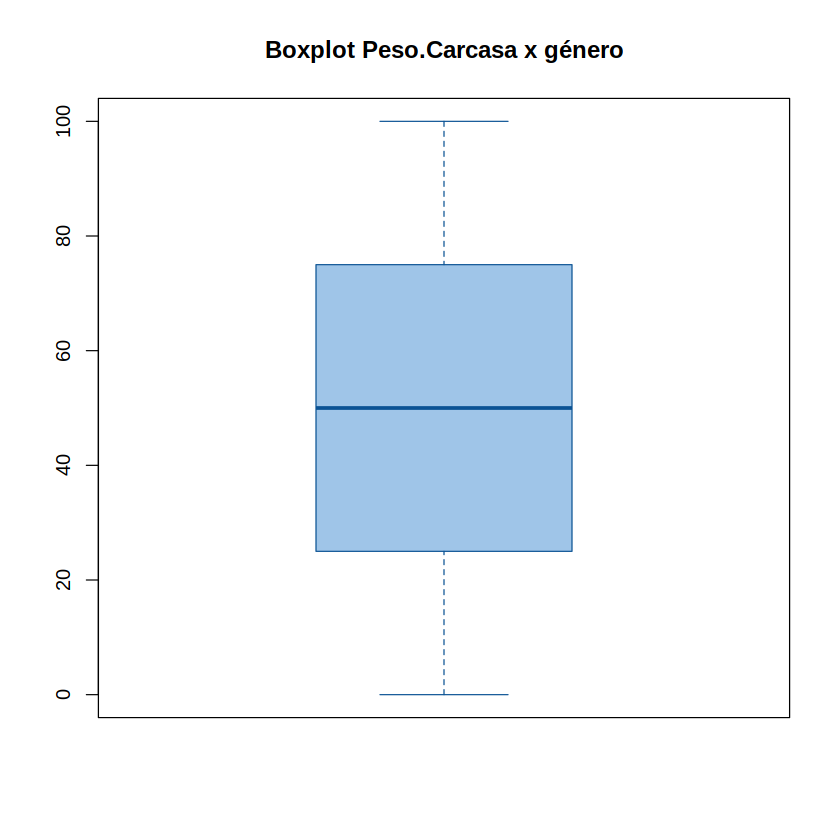

In [580]:
boxplot(df_final$edad
        ,col = "#9fc5e8"
        ,border="#0b5394"
        ,main = "Boxplot Peso.Carcasa x género" #título del gráfico        
        )

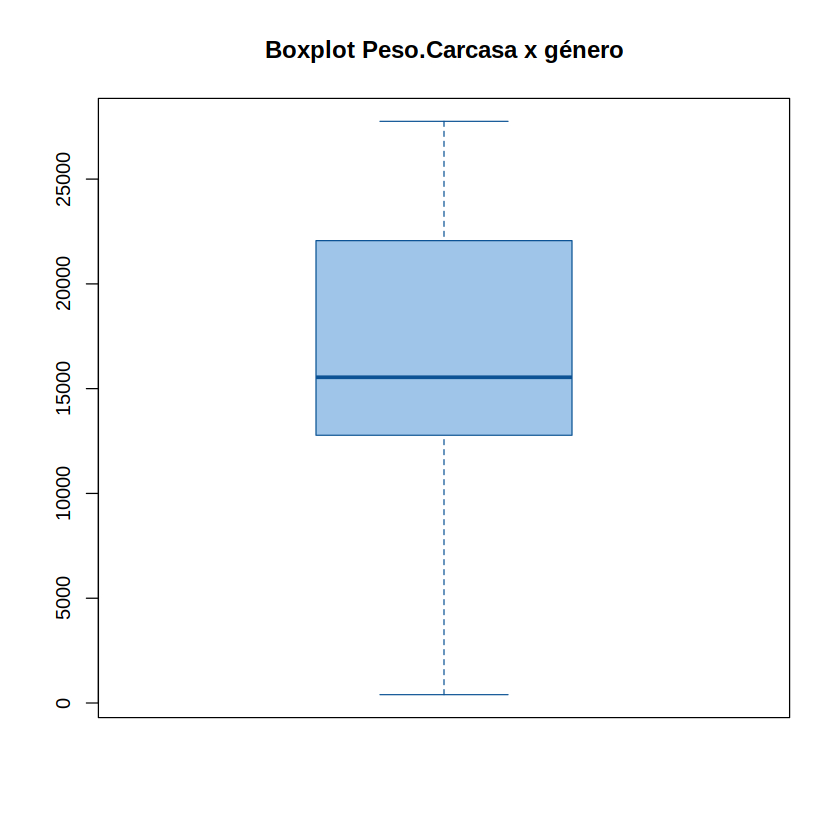

In [582]:
boxplot(df_final$df
        ,col = "#9fc5e8"
        ,border="#0b5394"
        ,main = "Boxplot Peso.Carcasa x género" #título del gráfico        
        )

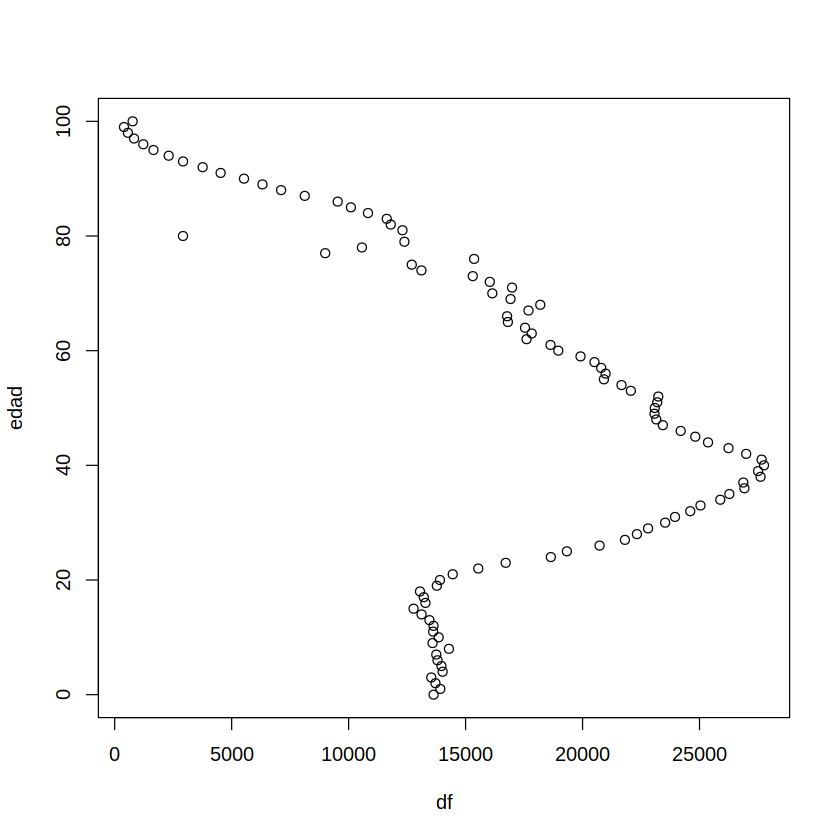

In [979]:
plot(df_final, 'df', 'edad')

CONCLUSIONES
- Como se pueden ver en los resultados anteriores, la edad de 40 años representa el mayor numero de la población
- Podemos ver que de los 0 a los 20 y entre los 75 y los 80, representa el mismo número de la población. Es decir, encontramos el mismo número de población para los perfiles de usuarios mencionados
- La edad que representa el menor número de población, son los 100 años.

* Cabe destacar que el valor de la desviación estandar calculada no representa el dataframe en cuestión. Tema a comentar en clase!

PROBLEMA 2

El fichero 20221110_DataFrutasHortalizasVerduras.csv contiene datos nutricionales de una selección de alimentos frescos (frutas, hortalizas y verduras)

Definid un posible caso de uso para este dataset y realizad un análisis exploratorio de los datos que aporte información relevante en relación a vuestro caso de uso.

 

Entrega: fichero Jupyter Notebook con todo el código desarrollado para ambos problemas con MD004NombreApellidosAC02.pdf 

In [859]:
data <- read.csv(file = '20221110_DataFrutasHortalizasVerduras.csv', header = TRUE, sep = ';', dec = '.')  

head(data)


,Id,Nombre,Grupo,SubGrupo,Energia_kcal,Grasas_g,AGS_g,AGM_g,AGP_g,HidratosC_g,Azucares_g,Proteina_g,Sodio_mg,Agua_g,Fibra_g,Calcio_mg,Yodo_mg,Potasio_mg,Fosforo_mg
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,1,Acedera,Verduras y hortalizas,Tallo u hoja,33,"0,7",0,0,0,"3,2",0,2,4,93,"2,9",44,0,390,63
2,2,Acelgas frescas,Verduras y hortalizas,Tallo u hoja,41,"0,4","0,03","0,04","0,07","4,5",1,2,147,"87,5","5,6",113,35,550,40
3,3,Achicoria,Verduras y hortalizas,Tallo u hoja,36,"0,3","0,073","0,006","0,131","4,7","0,7","1,7",45,92,4,100,0,420,47
4,4,Ajo,Verduras y hortalizas,Raices o bulbos,118,"0,3","0,05",0,"0,15",23,"2,3","5,3",19,"70,3","1,1",14,94,529,134
5,5,Alcachofas frescas,Verduras y hortalizas,Inflorescencia,44,"0,1","0,02","0,01","0,05","7,5","7,5","2,3",47,"88,1",2,45,1,430,130
6,6,Algas musgo de Irlanda frescas,Verduras y hortalizas,Tallo u hoja,32,"0,2","0,033","0,015","0,055",0,0,"1,5",67,86,"12,3",72,0,63,160


In [949]:
data_clean = data.frame(data[, -6:-17])


data_clean[,5] = as.character(data_clean$Energia_kcal)
data_clean[,6] = as.character(data_clean$Potasio_mg)
data_clean[,7] = as.character(data_clean$Fosforo_mg)

data_clean[,5] = as.numeric(data_clean$Energia_kcal)
data_clean[,6] = as.numeric(data_clean$Potasio_mg)
data_clean[,7] = as.numeric(data_clean$Fosforo_mg)

summary(data_clean)

data_clean

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


       Id                     Nombre                      Grupo   
 Min.   :  1.00   Acedera        :  1   Frutas               :44  
 1st Qu.: 27.25   Acelgas frescas:  1   Verduras y hortalizas:62  
 Median : 53.50   Achicoria      :  1                             
 Mean   : 53.50   Aguacate       :  1                             
 3rd Qu.: 79.75   Ajo            :  1                             
 Max.   :106.00   Albaricoque    :  1                             
                  (Other)        :100                             
            SubGrupo   Energia_kcal      Potasio_mg      Fosforo_mg    
 Fruto          :41   Min.   : 13.00   Min.   :  0.0   Min.   :  0.00  
 Frutos         :10   1st Qu.: 28.00   1st Qu.:200.0   1st Qu.: 22.00  
 Inflorescencia : 7   Median : 39.50   Median :260.0   Median : 32.00  
 Raices o bulbos:17   Mean   : 53.08   Mean   :276.2   Mean   : 40.33  
 Semilla        : 3   3rd Qu.: 62.50   3rd Qu.:339.2   3rd Qu.: 52.25  
 Tallo u hoja   :28   Max.   :37

Id,Nombre,Grupo,SubGrupo,Energia_kcal,Potasio_mg,Fosforo_mg
<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,Acedera,Verduras y hortalizas,Tallo u hoja,33,390,63
2,Acelgas frescas,Verduras y hortalizas,Tallo u hoja,41,550,40
3,Achicoria,Verduras y hortalizas,Tallo u hoja,36,420,47
4,Ajo,Verduras y hortalizas,Raices o bulbos,118,529,134
5,Alcachofas frescas,Verduras y hortalizas,Inflorescencia,44,430,130
6,Algas musgo de Irlanda frescas,Verduras y hortalizas,Tallo u hoja,32,63,160
7,Algas wakame frescas,Verduras y hortalizas,Tallo u hoja,54,50,80
8,Apio,Verduras y hortalizas,Tallo u hoja,16,341,32
9,Batata,Verduras y hortalizas,Raices o bulbos,101,320,60


In [961]:


df = na.omit(data_clean)
summary(df)


       Id                     Nombre                     Grupo   
 Min.   :  1.00   Acedera        : 1   Frutas               :38  
 1st Qu.: 26.00   Acelgas frescas: 1   Verduras y hortalizas:59  
 Median : 51.00   Achicoria      : 1                             
 Mean   : 52.15   Aguacate       : 1                             
 3rd Qu.: 78.00   Ajo            : 1                             
 Max.   :106.00   Albaricoque    : 1                             
                  (Other)        :91                             
            SubGrupo   Energia_kcal      Potasio_mg      Fosforo_mg    
 Fruto          :35   Min.   : 13.00   Min.   : 50.0   Min.   :  8.00  
 Frutos         : 8   1st Qu.: 28.00   1st Qu.:207.0   1st Qu.: 22.00  
 Inflorescencia : 7   Median : 39.00   Median :271.0   Median : 33.00  
 Raices o bulbos:17   Mean   : 53.61   Mean   :284.8   Mean   : 40.97  
 Semilla        : 3   3rd Qu.: 65.00   3rd Qu.:350.0   3rd Qu.: 53.00  
 Tallo u hoja   :27   Max.   :373.00   M

In [963]:
str(df)

'data.frame':	97 obs. of  7 variables:
 $ Id          : int  1 2 3 4 5 6 7 8 9 11 ...
 $ Nombre      : Factor w/ 106 levels "Acedera","Acelgas frescas",..: 1 2 3 5 7 8 9 10 12 14 ...
 $ Grupo       : Factor w/ 2 levels "Frutas","Verduras y hortalizas": 2 2 2 2 2 2 2 2 2 2 ...
 $ SubGrupo    : Factor w/ 6 levels "Fruto","Frutos",..: 6 6 6 4 3 6 6 6 4 6 ...
 $ Energia_kcal: num  33 41 36 118 44 32 54 16 101 29 ...
 $ Potasio_mg  : num  390 550 420 529 430 63 50 341 320 230 ...
 $ Fosforo_mg  : num  63 40 47 134 130 160 80 32 60 52 ...
 - attr(*, "na.action")= 'omit' Named int  10 39 59 71 72 79 84 96 102
  ..- attr(*, "names")= chr  "10" "39" "59" "71" ...


In [968]:

min(df$Energia_kcal)
max(df$Energia_kcal)


[1] 13

[1] 373

In [969]:
min(df$Potasio_mg)
max(df$Potasio_mg)


[1] 50

[1] 628

In [981]:
min(df$Fosforo_mg)
max(df$Fosforo_mg)

[1] 8

[1] 160

In [983]:
sd(df$Energia_kcal)
var(df$Energia_kcal)

[1] 50.9206

[1] 2592.907

In [985]:
sd(df$Potasio_mg)
var(df$Potasio_mg)

[1] 119.7506

[1] 14340.22

In [986]:
sd(df$Fosforo_mg)
var(df$Fosforo_mg)

[1] 27.28265

[1] 744.3428

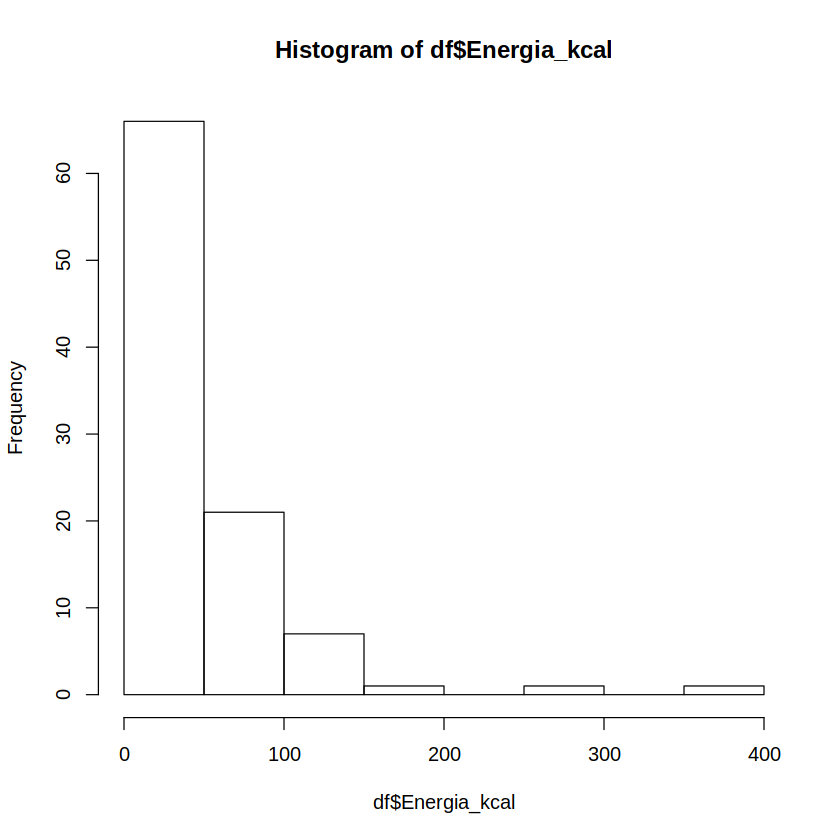

In [974]:
hist(df$Energia_kcal)

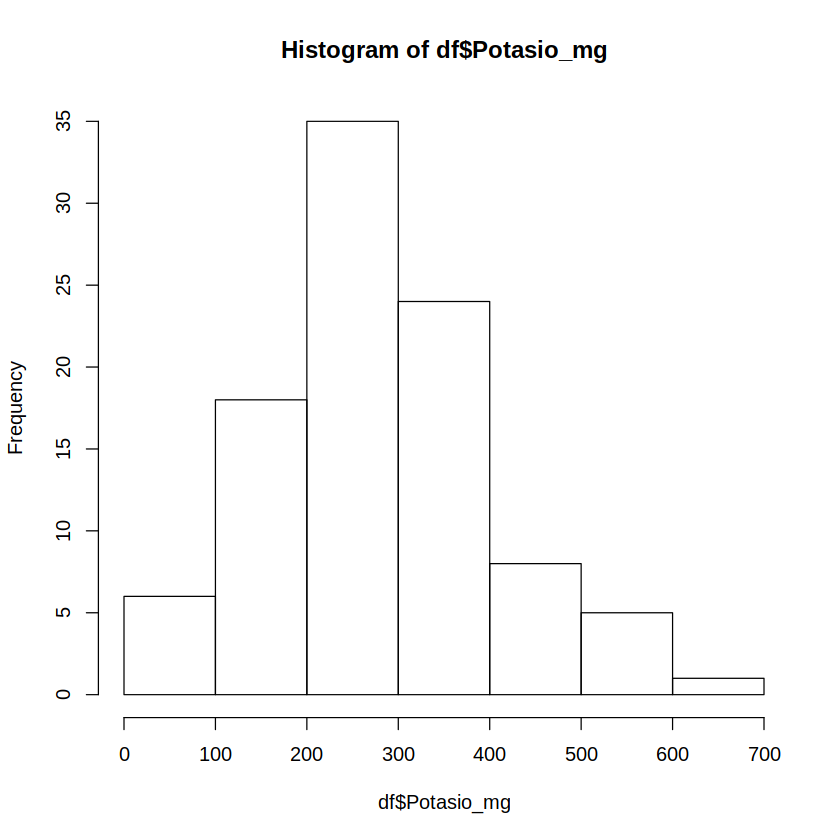

In [976]:
hist(df$Potasio_mg)

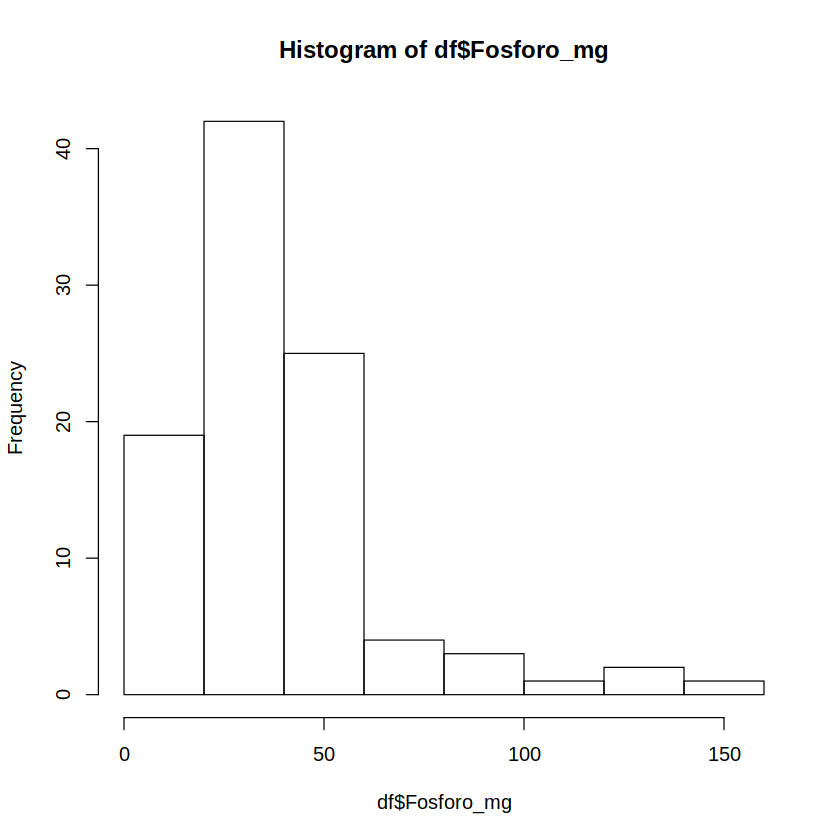

In [996]:
hist(df$Fosforo_mg)

In [1011]:
df_comparison = df[df$Energia_kcal > 372 | df$Potasio_mg > 627 | df$Fosforo_mg > 159, ]
df_comparison


,Id,Nombre,Grupo,SubGrupo,Energia_kcal,Potasio_mg,Fosforo_mg
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
6,6,Algas musgo de Irlanda frescas,Verduras y hortalizas,Tallo u hoja,32,63,160
103,103,Tamarindo,Frutas,Semilla,277,628,113
106,106,Coco fresco,Frutas,Semilla,373,405,94


CONCLUSIONES
- Las frutas y hortalizas acosumbran a ser bajas en calorias, entre 0 y 50 kcal
- De lo contrario, la mayoria de ellas suelen tener un alto porcentaje entre 200 y 300 mg de Potasio
- En lo que respecte a los niveles de fosforo, la mayoria de las verduras suelen tener bajo contenido. Entre 0 y 50 mg de Fosforo.

- El alimento que contiene mayor numero de kcal es: el Coco fresco
- El alimento que contiene mayor niveles de Potasio es: el Tamarindo
- El alimento que contien mayor niveles de Fosforo es: Las algas de musgo de Irlanda Frescas


- El alimento más equilibrado teniendo en cuenta los tres tipos de nutrientes y minerales es: El Tamarindo
